In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc
from __future__ import absolute_import, division, print_function, unicode_literals

In [4]:
csv_columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
species=['Setosa', 'Versicolor', 'Virginica']

In [5]:
train_path=tf.keras.utils.get_file("iris_training.csv",
                                   "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path=tf.keras.utils.get_file("iris_test.csv", 
                                  "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

In [6]:
train=pd.read_csv(train_path,names=csv_columns,header=0)
test=pd.read_csv(test_path,names=csv_columns,header=0)

In [7]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [8]:
test.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [9]:
train_y=train.pop("Species")
test_y=test.pop("Species")

In [10]:
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [11]:
train.shape

(120, 4)

In [12]:
def input_fn(features,labels,training=True,batch_size=256):
    dataset=tf.data.Dataset.from_tensor_slices((dict(features),labels))
    if training:
        dataset=dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)   

In [13]:
my_feature_columns=[]
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [14]:
classifier=tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    hidden_units=[30,10],
    n_classes=len(train_y.unique()))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\ANKURS~1\\AppData\\Local\\Temp\\tmpgs37x8if', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
classifier.train(input_fn=lambda: input_fn(train,train_y,training=True),steps=5000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\ANKURS~1\AppData\Local\Temp\tmpgs37x8if\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 3.1217542, step = 0
INFO:tensorflow:global_step/sec: 248.738
INFO:tensorflow:loss = 1.6740618, step = 100 (0.454 sec)
INFO:tensorflow:global_step/sec: 144.8
INFO:tensorflow:loss = 1.32586, step = 200 (0.646 sec)
INF

In [16]:
eval_result=classifier.evaluate(input_fn=lambda: input_fn(test,test_y,training=False))
print(eval_result)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2021-04-06T17:45:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ANKURS~1\AppData\Local\Temp\tmpgs37x8if\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.21388s
INFO:tensorflow:Finished evaluation at 2021-04-06-17:45:41
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.8333333, average_loss = 0.6175067, global_step = 5000, loss = 0.6175067
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\ANKURS~1\AppData\Local\Temp\tmpgs37x8if\model.ckpt-5000
{'accuracy': 0.8333333, 'average_loss': 0.6175067, 'loss': 0.6175067, 'global_step': 5000}


In [17]:
def input_fn(features,batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

In [18]:
features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted")
for feature in features:
    valid=True
    while valid:
        val=input(feature+":")
        if not val.isdigit():valid=False
    predict[feature]=[float(val)]
    
predictions=classifier.predict(input_fn=lambda:input_fn(predict))
for pred_dict in predictions:
    class_id=pred_dict['class_ids'][0]
    probability=pred_dict['probabilities'][class_id]
    print('Prediction is "{}" ({:.1f}%)'.format(species[class_id], 100 * probability))

Please type numeric values as prompted
SepalLength:2.4
SepalWidth:2.6
PetalLength:4.5
PetalWidth:5.6
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ANKURS~1\AppData\Local\Temp\tmpgs37x8if\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (41.2%)


In [46]:
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

In [47]:
predictions_x=classifier.predict(input_fn=lambda:input_fn(predict_x))

In [48]:
expected = ['Setosa', 'Versicolor', 'Virginica']
i=0
for pred_dict in predictions_x:
    class_id=pred_dict['class_ids'][0]
    probability=pred_dict['probabilities'][class_id]
    print('Prediction is "{}" ({:.1f}%)'.format(species[class_id], 100 * probability))
    print('Actual',expected[i])
    i+=1

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\ANKURS~1\AppData\Local\Temp\tmpgs37x8if\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Setosa" (74.9%)
Actual Setosa
Prediction is "Virginica" (41.7%)
Actual Versicolor
Prediction is "Virginica" (48.5%)
Actual Virginica


## Hidden Markov models

In [22]:
import tensorflow_probability as tfp

In [23]:
tfd=tfp.distributions
initial_distribution=tfd.Categorical(probs=[0.2,0.8])
transition_distribution=tfd.Categorical(probs=[[0.5,0.5],[0.2,0.8]])
observation_distribution=tfd.Normal(loc=[0.,15.],scale=[5.,10.])

In [24]:
model=tfd.HiddenMarkovModel(initial_distribution=initial_distribution,transition_distribution=transition_distribution,
                           observation_distribution=observation_distribution,num_steps=7)

In [25]:
mean=model.mean()
with tf.compat.v1.Session() as sess:
    print(mean.numpy())

[12.       11.1      10.83     10.748999 10.724699 10.71741  10.715222]


## Neural networks

In [26]:
from tensorflow import keras

In [27]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [28]:
train_images.shape

(60000, 28, 28)

In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

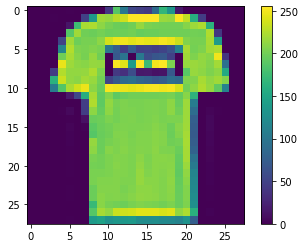

In [30]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.show()

In [31]:
train_images=train_images/255.0
test_images=test_images/255.0

In [32]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [33]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
model.fit(train_images,train_labels,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.6591 - accuracy: 0.7707 - val_loss: 0.4160 - val_accuracy: 0.8534
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3946 - accuracy: 0.8582 - val_loss: 0.3663 - val_accuracy: 0.8701
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3530 - accuracy: 0.8729 - val_loss: 0.3708 - val_accuracy: 0.8704
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3186 - accuracy: 0.8832 - val_loss: 0.3371 - val_accuracy: 0.8789
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2948 - accuracy: 0.8924 - val_loss: 0.3333 - val_accuracy: 0.8816
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2849 - accuracy: 0.8942 - val_loss: 0.3421 - val_accuracy: 0.8743
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2784 - accuracy: 0.8961 - val_loss: 0.3272 - val_accuracy

In [35]:
model.evaluate(test_images,test_labels,verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8735


[0.359631210565567, 0.8734999895095825]

In [36]:
predictions=model.predict(test_images)

Pullover


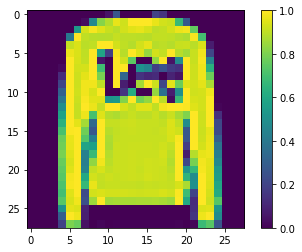

In [37]:
print(class_names[np.argmax(predictions[1])])
plt.figure()
plt.imshow(test_images[1])
plt.colorbar()
plt.show()

In [38]:
def predict(model,image,label):
    prediction=model.predict(np.array([image]))
    print("Expected outcome: ",class_names[label])
    plt.figure()
    plt.imshow(image)
    plt.colorbar()
    plt.show()
    print("Actual outcome from model: ",class_names[np.argmax(prediction)])

def get_number():
    while True:
        n=int(input("Enter a number: "))
        if n==-1: return
        predict(model,test_images[n],test_labels[n])

Enter a number: 789
Expected outcome:  Sneaker


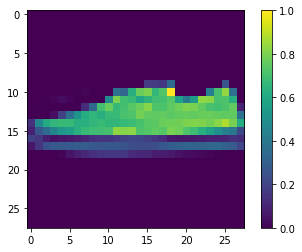

Actual outcome from model:  Sneaker
Enter a number: 986
Expected outcome:  Pullover


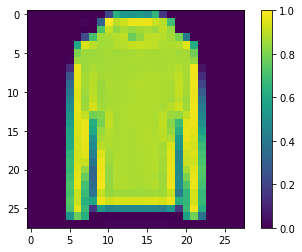

Actual outcome from model:  Pullover
Enter a number: 267
Expected outcome:  Bag


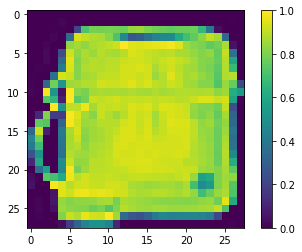

Actual outcome from model:  Bag
Enter a number: 100
Expected outcome:  Dress


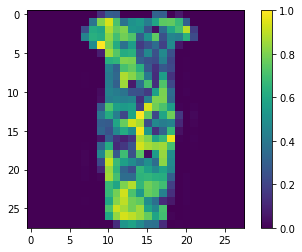

Actual outcome from model:  Dress
Enter a number: -1


In [49]:
get_number()